In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_clean.csv")

In [3]:
print (data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [4]:
# data1 = data.drop(['Unnamed: 0',"Temp C"], axis =1, inplace = true
data1 = data.drop(['Unnamed: 0',"Temp C"],axis =1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [5]:
# Convert the month column data type to float data type

data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [6]:
# Checking for duplicated rows in the table
#print all duplicated rows
data1[data1.duplicated(keep = False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [7]:
# Checking for duplicated rows in the table
#print only the duplicated row (one) only
data1[data1.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [8]:
# Drop duplicated rows
data1.drop_duplicates(keep='first', inplace = True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [9]:
# Change column names (Rename the columns)
data1.rename({'Solar.R': 'Solar'}, axis=1, inplace = True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [10]:
data.isnull().sum()

Unnamed: 0     0
Ozone         38
Solar.R        7
Wind           0
Temp C         0
Month          0
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

<Axes: >

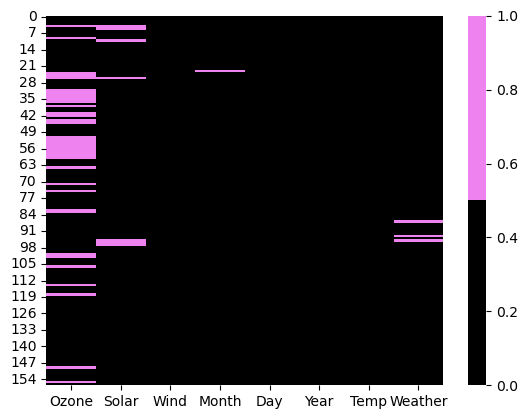

In [11]:
cols = data1.columns
colors = ['black', 'violet']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)


In [12]:
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  31.0
Mean of Ozone:  41.81512605042017


In [13]:
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [14]:
median_Solar = data1["Solar"].median()
mean_Solar = data1["Solar"].mean()
print("Median of Solar: ", median_Solar)
print("Mean of Solar: ", mean_Solar)

Median of Solar:  199.0
Mean of Solar:  185.36666666666667


In [15]:
data1['Solar'] = data1['Solar'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [16]:
data1.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,31.0,31.0,14.3,5.0,5,2010,56,S


In [17]:
print(data1["Weather"].value_counts())
mode_Weather = data1["Weather"].mode()[0]
print(mode_Weather)

Weather
S     58
C     49
PS    47
Name: count, dtype: int64
S


In [18]:
data1["Weather"] = data1["Weather"].fillna(mode_Weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [19]:
print(data1["Month"].value_counts())
mode_month = data1["Month"].mode()[0]
print(mode_month)

Month
9.0    33
5.0    31
7.0    31
8.0    31
6.0    30
Name: count, dtype: int64
9.0


In [20]:
data1["Month"] = data1["Month"].fillna(mode_month)
data.isnull().sum()

Unnamed: 0     0
Ozone         38
Solar.R        7
Wind           0
Temp C         0
Month          0
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

In [21]:
mode_month = data1["Month"].mode()[0]
data1["Month"] = data1["Month"].fillna(mode_month)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [22]:
data1.reset_index(drop=True)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,31.0,31.0,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,31.0,145.0,13.2,9.0,27,2010,77,S


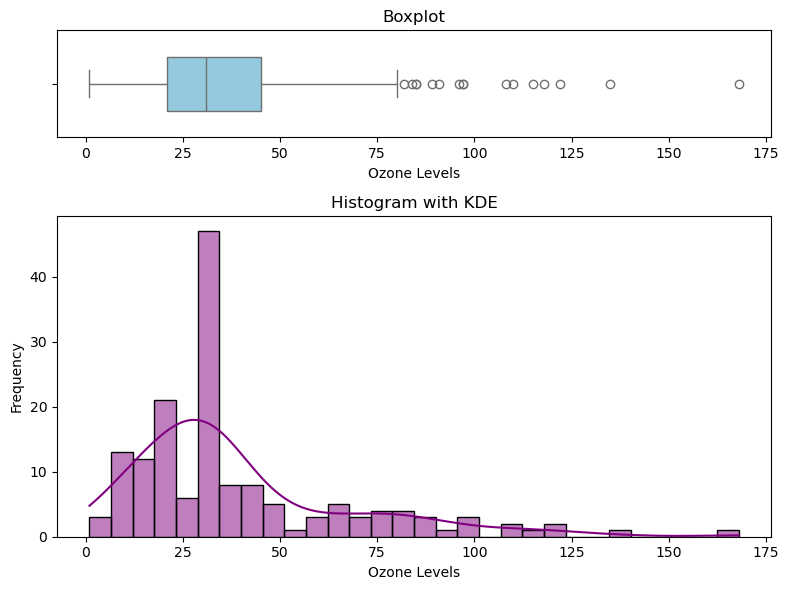

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

#plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Ozone"], ax=axes[0], color = 'skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")

# plot the histogram with kde curve in the second (bottom) subplot

sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

#adjust layout for better spaces
plt.tight_layout()

# show the plot
plt.show()

#### OBSERVATIONS
- the ozone vaues has extreme values beyond 81 as seen fro Box plot
- the same is confirmed from the below right = skewed histogram


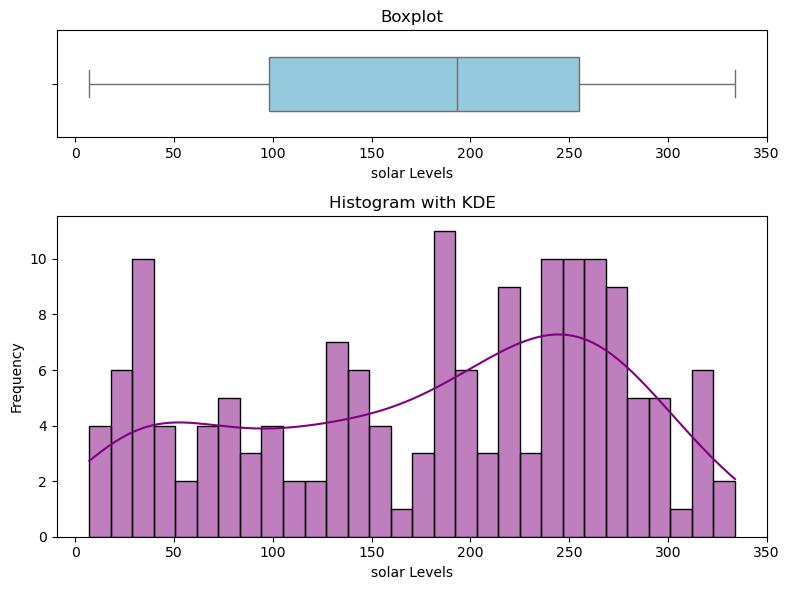

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

#plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Solar"], ax=axes[0], color = 'skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("solar Levels")

# plot the histogram with kde curve in the second (bottom) subplot

sns.histplot(data1["Solar"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("solar Levels")
axes[1].set_ylabel("Frequency")

#adjust layout for better spaces
plt.tight_layout()

# show the plot
plt.show()

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

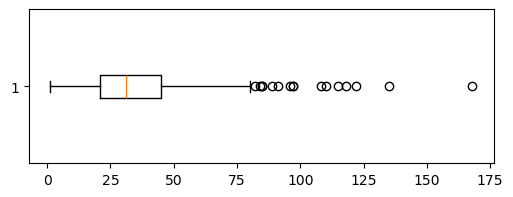

In [26]:
# extract outliers from boxplot for Ozone column

plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(data1["Ozone"],vert=False)
[item.get_xdata() for item in boxplot_data['fliers']]

#### method 2
- using mu +/-3*sigma limts

In [28]:
data1["Ozone"].describe()

count    157.000000
mean      39.197452
std       28.781992
min        1.000000
25%       21.000000
50%       31.000000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [29]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
      print(x)

135.0
168.0


C:\Users\Sunny\AppData\Local\Temp\ipykernel_33708\2790033013.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
C:\Users\Sunny\AppData\Local\Temp\ipykernel_33708\2790033013.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


#### 
-Quantile-Quantile plot for detection of ouliers


In [31]:
mu = data1["Solar"].describe()[1]
sigma = data1["Solar"].describe()[2]

for x in data1["Solar"]:
    if((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
      print(x)


C:\Users\Sunny\AppData\Local\Temp\ipykernel_33708\4237351348.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Solar"].describe()[1]
C:\Users\Sunny\AppData\Local\Temp\ipykernel_33708\4237351348.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Solar"].describe()[2]


#### OBSERVATIONS
- the data does not follow normal distribution as the data points are deviating significatly away from the red line
- the data shows a right-skewed distibutaion and possiable outliers

Text(0.5, 0, 'Theoretical Quantiles')

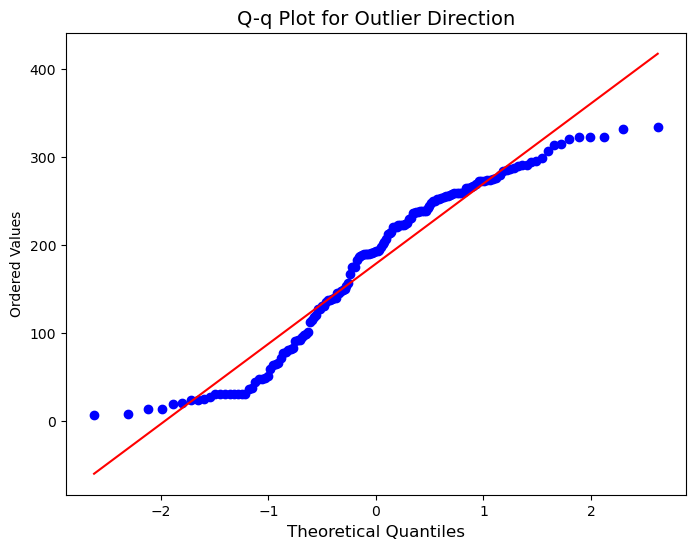

In [33]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(data1["Solar"], dist="norm", plot=plt)
plt.title("Q-q Plot for Outlier Direction", fontsize=14)

plt.xlabel("Theoretical Quantiles", fontsize=12)


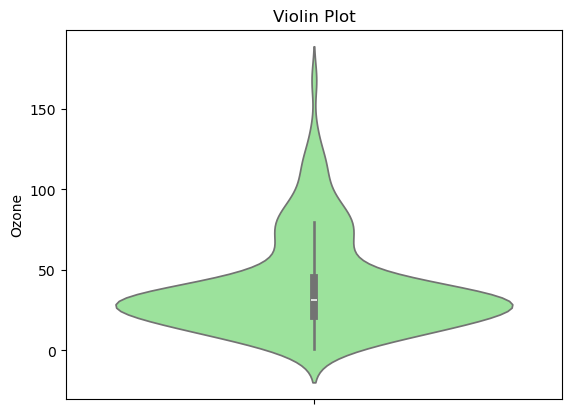

In [34]:
sns.violinplot(data=data1["Ozone"], color='Lightgreen')
plt.title("Violin Plot")
plt.show()

C:\Users\Sunny\AppData\Local\Temp\ipykernel_33708\3276811969.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data1, x = "Weather", y ="Ozone", palette="Set2")


<Axes: xlabel='Weather', ylabel='Ozone'>

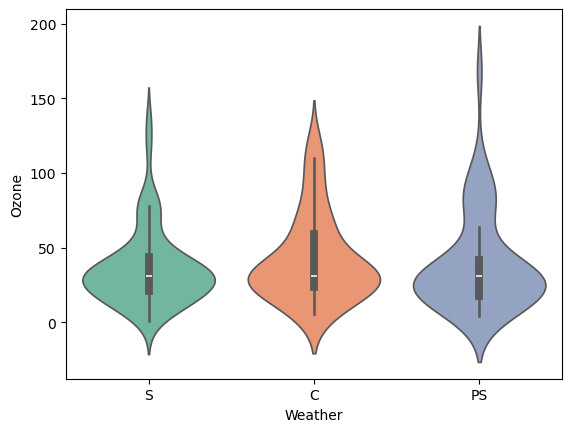

In [35]:
sns.violinplot(data=data1, x = "Weather", y ="Ozone", palette="Set2")


C:\Users\Sunny\AppData\Local\Temp\ipykernel_33708\3858155793.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2")


<Axes: xlabel='Weather', ylabel='Ozone'>

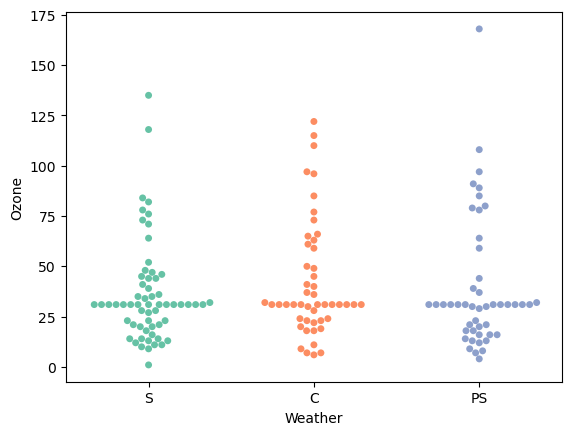

In [36]:
sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2")

C:\Users\Sunny\AppData\Local\Temp\ipykernel_33708\2013547786.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2")


<Axes: xlabel='Weather', ylabel='Ozone'>

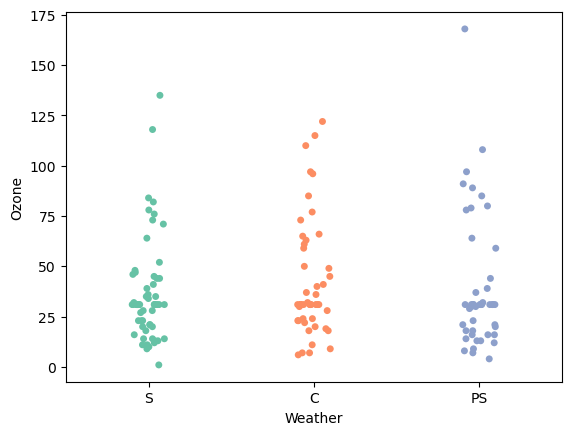

In [37]:
sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2")

<Axes: xlabel='Ozone', ylabel='Density'>

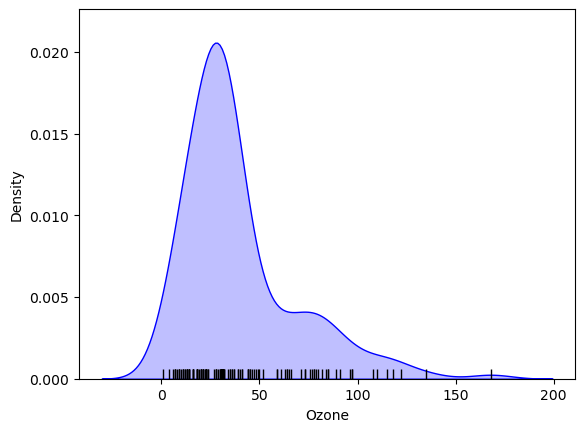

In [38]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="blue")
sns.rugplot(data=data1["Ozone"], color="black")

<Axes: xlabel='Weather', ylabel='Ozone'>

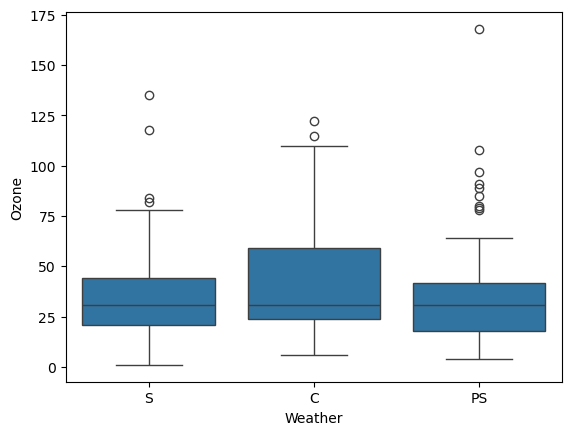

In [39]:
sns.boxplot(data = data1, x = "Weather", y="Ozone")

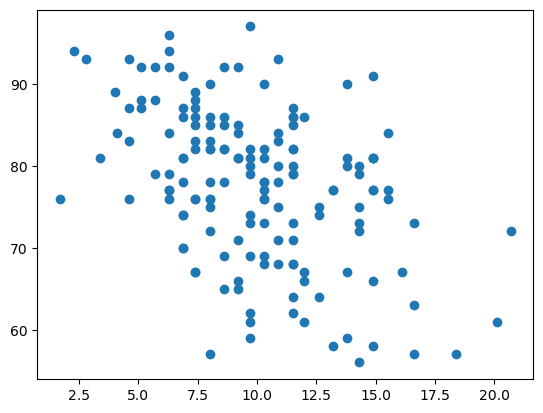

In [40]:
# correlations coefficient and pair plots
plt.scatter(data1["Wind"],data1["Temp"])        

In [41]:
data1["Wind"].corr(data1["Temp"])

-0.44122806925588215

In [42]:
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,31.0,31.0,14.3,56
...,...,...,...,...
152,20.0,223.0,11.5,68
153,41.0,190.0,7.4,67
154,30.0,193.0,6.9,70
155,31.0,145.0,13.2,77


#### Observation
-The correlation between and temp is oberserved to be negatively correlated with mild strength

In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    157 non-null    float64
 1   Solar    157 non-null    float64
 2   Wind     157 non-null    float64
 3   Month    157 non-null    float64
 4   Day      157 non-null    int64  
 5   Year     157 non-null    int64  
 6   Temp     157 non-null    int64  
 7   Weather  157 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 15.1+ KB


In [45]:
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,31.0,31.0,14.3,56
...,...,...,...,...
152,20.0,223.0,11.5,68
153,41.0,190.0,7.4,67
154,30.0,193.0,6.9,70
155,31.0,145.0,13.2,77


In [46]:
# print correlation coefficients for all the above columns
data1_numeric.corr()

,Ozone,Solar,Wind,Temp
Ozone,1.000000,0.278802,-0.523738,0.597087
Solar,0.278802,1.000000,-0.032619,0.282392
Wind,-0.523738,-0.032619,1.000000,-0.441228
Temp,0.597087,0.282392,-0.441228,1.000000


#### Observations
- The highest correlation strength is observed between Ozone and Tempetature(0.597087)
- The next higher correlation strength is observered between Ozone and wind(-0.523738)
- The next higher correlation strength is observered between wind and Temp(-0.441228)
- The least correlation strength is observered between solar and wind (-0.055874)

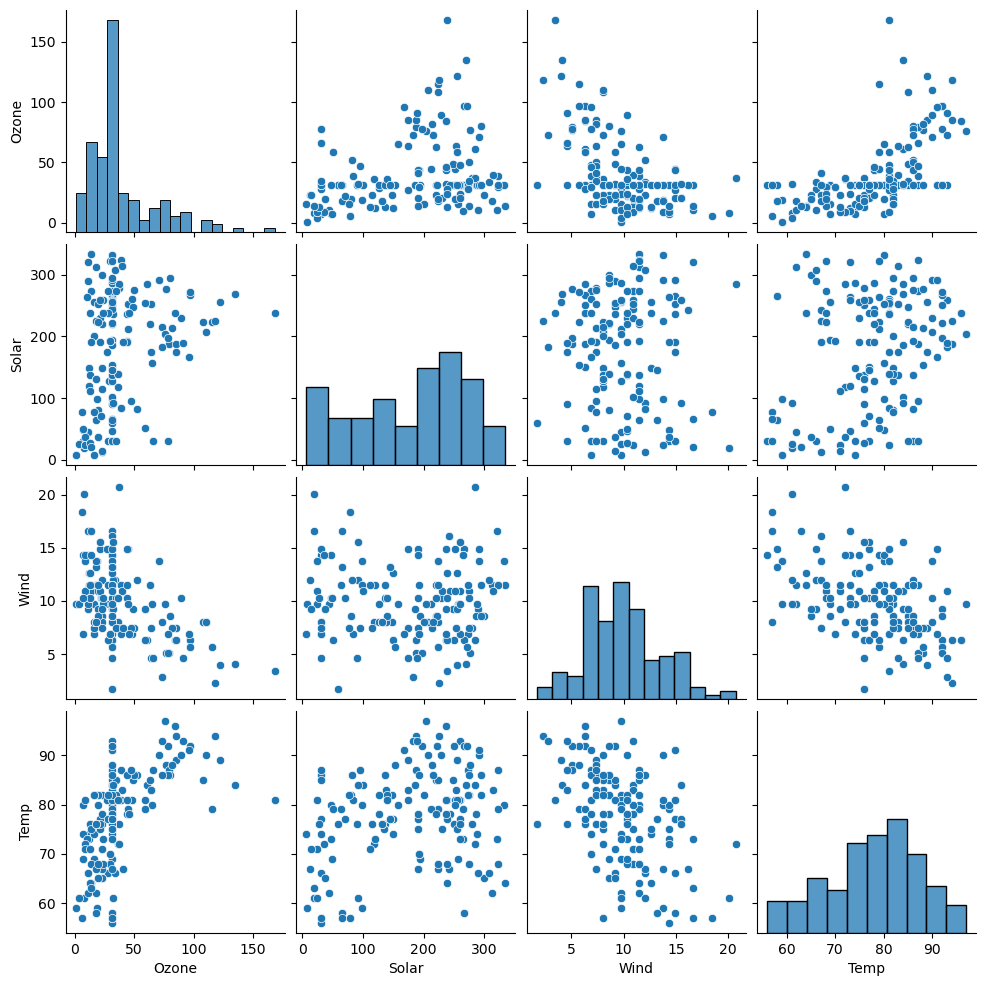

In [48]:
sns.pairplot(data1_numeric)

#### Transformations

In [93]:
data2=pd.get_dummies(data1,columns=['Month','Weather'])
data2

,Ozone,Solar,Wind,Day,Year,Temp,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Weather_C,Weather_PS,Weather_S
0,41.0,190.0,7.4,1,2010,67,True,False,False,False,False,False,False,True
1,36.0,118.0,8.0,2,2010,72,True,False,False,False,False,True,False,False
2,12.0,149.0,12.6,3,2010,74,True,False,False,False,False,False,True,False
3,18.0,313.0,11.5,4,2010,62,True,False,False,False,False,False,False,True
4,31.0,31.0,14.3,5,2010,56,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,30,2010,68,False,False,False,False,True,False,False,True
153,41.0,190.0,7.4,1,2010,67,True,False,False,False,False,True,False,False
154,30.0,193.0,6.9,26,2010,70,False,False,False,False,True,False,True,False
155,31.0,145.0,13.2,27,2010,77,False,False,False,False,True,False,False,True
